In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
nx, ny = 20, 20   # dimensions of the reservior space
dx, dy = 25, 25   # the distance (in ft.) each cell in the grid block covers
dt = .01            # This is the timestep in days that the model will iterate through
nt = 20000        # This is the total number of steps I want to simulate in this simple reservoir model

# Reservoir properties

k = 1000  # permeability of the reservoir in (md)
mu = 1.0    # Viscosity (cp)
phi = .1    # porosity
ct = 1e-1   # compressibility (psi^-1)

# Conversion factor for field units
alpha = (0.0002637 * k) / (phi * mu * ct)  # diffusivity in ft^2/day
alpha

26.369999999999994

In [119]:
# Initialize the Reservoir Pressure Grid
P_init = 4000     #Initial pressure in (psi)
P = np.ones((ny, nx)) * P_init

# Add a pressure sink in the middle of the grid
P[ny // 2, nx // 2] = 1000

#Step through the time steps and simulate the flow through the reservoir grid
for n in range(nt):
    P_new = P.copy()
    for i in range(1, ny - 1):      # rows (y-direction)
        for j in range(1, nx - 1):  # columns (x-direction)
            d2P_dx2 = (P[i, j+1] - 2*P[i, j] + P[i, j-1]) / dx**2
            d2P_dy2 = (P[i+1, j] - 2*P[i, j] + P[i-1, j]) / dy**2
            P_new[i, j] += alpha * dt * (d2P_dx2 + d2P_dy2)
            
    #Establish the boundary conditions to keep them fixed
    P = P_new.copy()
    P[0, :] = P_init
    P[-1, :] = P_init
    P[:, 0] = P_init
    P[:, -1] = P_init
    P[ny // 2, nx // 2] = 1000

In [120]:
# Helper function to plot pressure
def plot_pressure(P, t):
    plt.figure(figsize=(6, 5))
    plt.imshow(P, cmap='viridis', origin='lower')
    plt.colorbar(label='Pressure (psi)')
    plt.title(f"Pressure Distribution at Time = {t} days")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    plt.show()

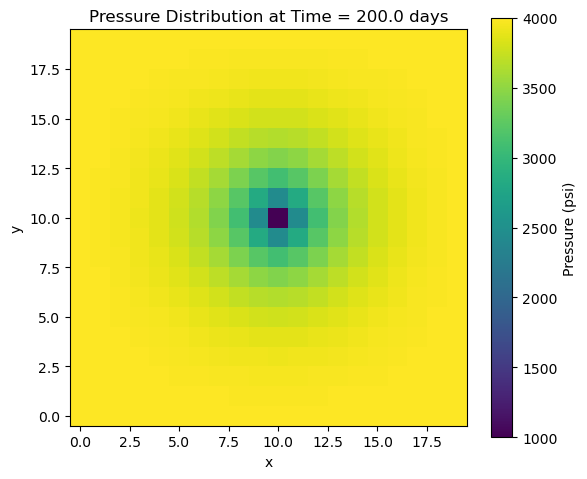

In [121]:
plot_pressure(P, nt*dt)

In [125]:
P

array([[4000.        , 4000.        , 4000.        , 4000.        ,
        4000.        , 4000.        , 4000.        , 4000.        ,
        4000.        , 4000.        , 4000.        , 4000.        ,
        4000.        , 4000.        , 4000.        , 4000.        ,
        4000.        , 4000.        , 4000.        , 4000.        ],
       [4000.        , 3999.36129517, 3998.56411001, 3997.45911264,
        3995.92647748, 3993.91367102, 3991.48622372, 3988.87149189,
        3986.46070038, 3984.73395703, 3984.1035196 , 3984.73526038,
        3986.46441451, 3988.880534  , 3991.50698433, 3993.95913756,
        3996.02145561, 3997.64802009, 3998.92101154, 4000.        ],
       [4000.        , 3998.56411001, 3996.76224838, 3994.24487207,
        3990.72205491, 3986.05001989, 3980.35462836, 3974.14888034,
        3968.3607995 , 3964.17275409, 3962.63351631, 3964.17561867,
        3968.36897303, 3974.16881393, 3980.40049268, 3986.15071392,
        3990.9330121 , 3994.66588495, 3997.560